In [1]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def getFilesNew(basePath):
    dirs = glob(basePath+"/*/")
    #print(dirs)
    for _dir in dirs:
        files = glob(_dir+"*B?*.tiff")
        #print(files)
        yield files

In [3]:
S_sentinel_bands_forest = list(getFilesNew("/tmp/shared/2d_dataset/forest"))

In [4]:
S_sentinel_bands_town = list(getFilesNew("/tmp/shared/2d_dataset/town"))

In [5]:
S_sentinel_bands_water = list(getFilesNew("/tmp/shared/2d_dataset/water"))

In [6]:
S_sentinel_bands_field = list(getFilesNew("/tmp/shared/2d_dataset/field"))

In [7]:
S_sentinel_bands_sands = list(getFilesNew("/tmp/shared/2d_dataset/sands"))

In [8]:
def getFilesArrayNew(paths):
    l = []
    for i in paths:
        s = []
        for j in i:
            with rio.open(j, 'r') as f:
                s.append(f.read(1))
        l.append(s)
    arr_st_new = np.stack(l)
    return  arr_st_new

In [9]:
forest_st = getFilesArrayNew(S_sentinel_bands_forest);

/usr/local/lib/python3.8/dist-packages/rasterio/__init__.py:277: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [10]:
town_st = getFilesArrayNew(S_sentinel_bands_town);

In [11]:
water_st = getFilesArrayNew(S_sentinel_bands_water);

In [12]:
field_st = getFilesArrayNew(S_sentinel_bands_field);

In [13]:
sands_st = getFilesArrayNew(S_sentinel_bands_sands);

In [14]:
town_st.shape

(55, 12, 100, 100)

In [14]:
town_st2 = np.moveaxis(town_st, 1, -1)

In [15]:
water_st2 = np.moveaxis(water_st, 1, -1)

In [16]:
field_st2 = np.moveaxis(field_st, 1, -1)

In [17]:
sands_st2 = np.moveaxis(sands_st, 1, -1)

In [18]:
forest_st2 = np.moveaxis(forest_st, 1, -1)

In [19]:
town_st3 = town_st2.reshape(-1, 20,20,12)

In [20]:
water_st3 = water_st2.reshape(-1, 20,20,12)

In [21]:
field_st3 = field_st2.reshape(-1, 20,20,12)

In [22]:
sands_st3 = sands_st2.reshape(-1, 20,20,12)

In [23]:
forest_st3 = forest_st2.reshape(-1, 20,20,12)

In [24]:
x_data = np.append(town_st3, water_st3,axis=0)
x_data = np.append(x_data, field_st3,axis=0)
x_data = np.append(x_data, sands_st3, axis=0)
x_data = np.append(x_data, forest_st3, axis=0)
x_data.shape

(4225, 20, 20, 12)

In [25]:
y_town = np.full((town_st3.shape[0],town_st3.shape[1],town_st3.shape[2]),1)
y_water = np.full((water_st3.shape[0],water_st3.shape[1],water_st3.shape[2]),2)
y_field = np.full((field_st3.shape[0],field_st3.shape[1],field_st3.shape[2]),3)
y_sands = np.full((sands_st3.shape[0],sands_st3.shape[1],sands_st3.shape[2]),4)
y_forest = np.full((forest_st3.shape[0],forest_st3.shape[1],forest_st3.shape[2]),5)

In [26]:
y_data = np.append(y_town, y_water,axis=0)
y_data = np.append(y_data, y_field, axis=0)
y_data = np.append(y_data, y_sands, axis=0)
y_data = np.append(y_data, y_forest, axis=0)

In [27]:
y_data.shape

(4225, 20, 20)

In [28]:
t_sst = t_st.reshape(-1, 20,20,12)

NameError: name 't_st' is not defined

In [29]:
#Let's import some important Libraries
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.utils import np_utils

In [30]:
y_data_train_cate = np_utils.to_categorical(y_data)

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
from keras.layers import *
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

In [33]:
model_new = tf.keras.models.Sequential([

])

2022-11-13 11:57:47.094104: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (34)
2022-11-13 11:57:47.094163: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c4823fc7808d): /proc/driver/nvidia/version does not exist
2022-11-13 11:57:47.094839: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
model_new.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy','MeanSquaredError'])

In [35]:
model_new.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [36]:
inputs = Input(shape=(20,20,12))
x = Conv2D(32, (3,3),strides=2, padding="same")(inputs)
x = BatchNormalization()(x)
x = Activation("relu")(x)

previous_block_activation = x

for filters in [32, 64, 128, 256]:
    x = Activation("relu")(x)
    x = SeparableConv2D(filters, (3,3), padding="same")(x)
    x = BatchNormalization()(x)

    x = Activation("relu")(x)
    x = SeparableConv2D(filters, (3,3), padding="same")(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D(3, strides=2, padding="same")(x)

    residual = Conv2D(filters, 1, strides=2, padding="same")(previous_block_activation)
    x = add([x, residual])
    previous_block_activation = x

for filters in [256, 128, 64]:
    x = Activation("relu")(x)
    x = Conv2DTranspose(filters, (3,3), padding="same")(x)
    x = BatchNormalization()(x)

    x = Activation("relu")(x)
    x = Conv2DTranspose(filters, (3,3), padding="same")(x)
    x = BatchNormalization()(x)

    x = UpSampling2D(2)(x)

    residual = UpSampling2D(2)(previous_block_activation)
    residual = Conv2D(filters, 1, padding="same")(residual)
    x = add([x, residual])  # Add back residual
    previous_block_activation = x

x = Activation("relu")(x)
x = Conv2DTranspose(32, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x = Activation("relu")(x)
x = Conv2DTranspose(32, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x = UpSampling2D(5)(x)
x = MaxPooling2D(2)(x)

residual = UpSampling2D(5)(previous_block_activation)
residual = MaxPooling2D(2)(residual)
residual = Conv2D(32, 1, padding="same")(residual)
x = add([x, residual])  # Add back residual

outputs = Conv2D(6, (3,3), activation="softmax", padding="same")(x)
#outputs = Dense(6)(outputs)
#outputs = Reshape((20,20,6))(outputs)
outputs = Activation("relu")(outputs)
#outputs = Reshape((10,10,6))(outputs)

In [37]:
previous_block_activation.shape

TensorShape([None, 8, 8, 64])

In [38]:
model = Model(inputs, outputs)

In [39]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy','MeanSquaredError'])

In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20, 20, 12)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 10, 10, 32)   3488        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 10, 10, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [41]:
x_data_norm = tf.keras.utils.normalize(x_data)

In [58]:
x_train = x_data

In [62]:
std = np.std(x_train)
mean= np.mean(x_train)

np.add(x_train, -mean, out=x_train, casting="unsafe")
#x_train/=std
np.divide(x_train, std, out=x_train, casting="unsafe")

array([[[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 6, 5],
         [0, 0, 0, ..., 0, 6, 6],
         [0, 0, 0, ..., 0, 6, 6]],

        [[0, 0, 0, ..., 6, 6, 6],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 6, 6],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 0],
         [0, 0, 1, ..., 0, 0, 6]],

        [[0, 0, 0, ..., 0, 5, 5],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 6],
         ...,
         [0, 0, 0, ..., 0, 0, 6],
         [0, 0, 0, ..., 6, 5, 5],
         [0, 0, 0, ..., 0, 6, 5]],

        ...,

        [[0, 0, 0, ..., 0, 6, 6],
         [0, 0, 0, ..., 0, 5, 5],
         [0, 0, 0, ..., 0, 6, 5],
         ...,
         [0, 0, 0, ..., 0, 6, 6],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 6, 6],
         [0, 0, 0, ..., 0, 0, 0],
    

In [64]:
history = model.fit(x_train,y_data_train_cate,epochs=50,batch_size=16,validation_split=0.2)

Epoch 1/50
212/212 [==============================] - 16s 67ms/step - loss: 0.3404 - accuracy: 0.9173 - mean_squared_error: 0.0220 - val_loss: 1.5500 - val_accuracy: 0.6648 - val_mean_squared_error: 0.0949
Epoch 2/50
212/212 [==============================] - 14s 64ms/step - loss: 0.0716 - accuracy: 0.9811 - mean_squared_error: 0.0053 - val_loss: 1.6465 - val_accuracy: 0.7083 - val_mean_squared_error: 0.0851
Epoch 3/50
212/212 [==============================] - 14s 67ms/step - loss: 0.0431 - accuracy: 0.9896 - mean_squared_error: 0.0029 - val_loss: 4.6115 - val_accuracy: 0.3062 - val_mean_squared_error: 0.2131
Epoch 4/50
212/212 [==============================] - 15s 70ms/step - loss: 0.0507 - accuracy: 0.9873 - mean_squared_error: 0.0035 - val_loss: 2.9593 - val_accuracy: 0.6764 - val_mean_squared_error: 0.0997
Epoch 5/50
212/212 [==============================] - 14s 66ms/step - loss: 0.0475 - accuracy: 0.9903 - mean_squared_error: 0.0026 - val_loss: 4.4773 - val_accuracy: 0.5303 - v

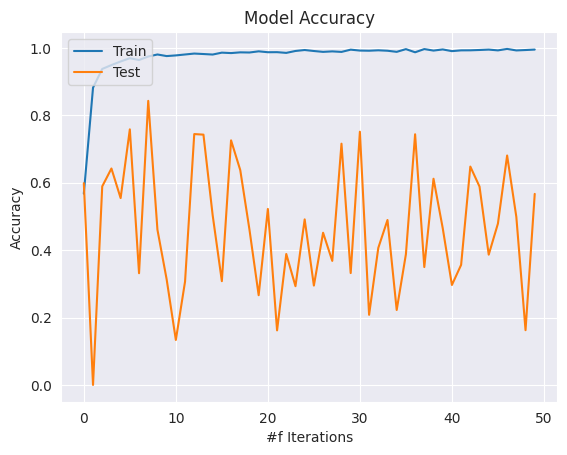

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Check

In [44]:
from glob import glob
S_sentinel_bands = glob("/tmp/shared/test_images2/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-

In [45]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [46]:
arr_st = np.stack(l)

In [47]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(733, 1250, 12)

In [48]:
x = x[0:720,0:1200,:]
x.shape

(720, 1200, 12)

In [49]:
x_r = x.reshape(-1,20,20,12)
x_r.shape

(2160, 20, 20, 12)

In [50]:
y_data_test = loadmat('/tmp/shared/test_images2/labeling.mat')['data']
y_data_test.shape

(733, 1250)

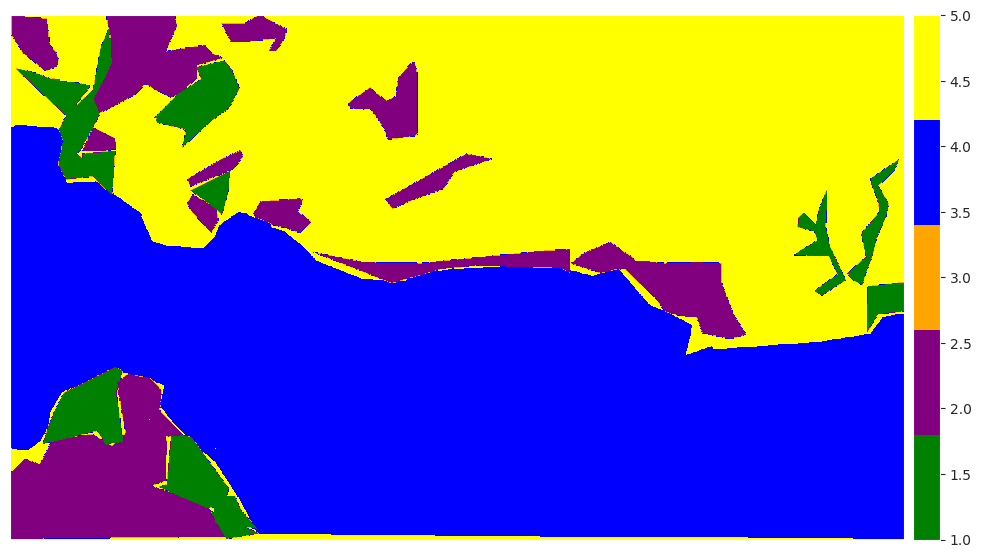

<AxesSubplot:>

In [51]:
ep.plot_bands(y_data_test,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [52]:
x_r_norm =  tf.keras.utils.normalize(x_r)

In [66]:
x_r_2 = x_r

In [67]:
std2 = np.std(x_r_2)
mean2 = np.mean(x_r_2)

np.add(x_r_2, -mean2, out=x_r_2, casting="unsafe")
#x_train/=std
np.divide(x_r_2, std2, out=x_r_2, casting="unsafe")

array([[[[-7.95167446e-01, -7.71352947e-01, -5.37539005e-01, ...,
           9.38953102e-01, -6.66635782e-02,  2.44467163e+00],
         [-8.07074606e-01, -7.21559286e-01, -4.90992665e-01, ...,
           9.64932382e-01, -6.04515523e-03,  2.12967229e+00],
         [-8.07074606e-01, -6.91250026e-01, -4.87745285e-01, ...,
           9.88746822e-01,  9.02948827e-02,  1.91750801e+00],
         ...,
         [-7.59445786e-01, -5.21301925e-01, -3.62178475e-01, ...,
           9.08643842e-01,  3.18696499e-01,  1.45204484e+00],
         [-7.49703526e-01, -5.00734925e-01, -2.72333294e-01, ...,
           1.05369508e+00,  5.57922900e-01,  1.68477619e+00],
         [-7.46456146e-01, -4.28209275e-01, -2.11714879e-01, ...,
           1.20199370e+00,  6.06634140e-01,  1.76812649e+00]],

        [[-7.51868427e-01, -5.62435865e-01, -3.35116714e-01, ...,
           1.07534468e+00,  3.92304569e-01,  1.54297233e+00],
         [-7.48621047e-01, -5.24549305e-01, -3.63260984e-01, ...,
           8.95654082e

In [68]:
prediction = model.predict(x_r_norm,batch_size=16)

135/135 [==============================] - 4s 31ms/step


In [69]:
prediction.shape

(2160, 20, 20, 6)

In [70]:
pred_cat = np.argmax(prediction,axis=3)
pred_cat.shape

(2160, 20, 20)

In [71]:
pred_pxl = pred_cat.reshape(720,1200)

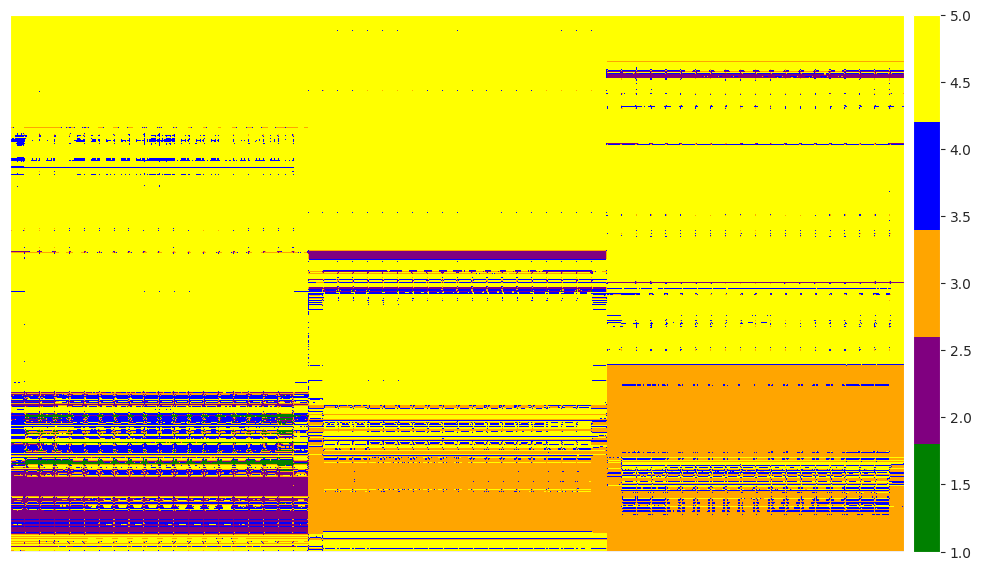

<AxesSubplot:>

In [57]:
ep.plot_bands(pred_pxl,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))